# Introduction

On se positionne en tant que fournisseur de solutions de développement spécialisées, offrant aux banques et aux assurances une application innovante leur permettant d'évaluer de manière précise la valeur actuelle de leurs parcs immobiliers.

Notre système peut être adapté pour répondre aux besoins variés des investisseurs en actions cherchant à acquérir des parts de parc immobilier, ainsi que d'autres acteurs du marché.

Chaque transaction réalisée à travers notre plateforme représente une opportunité lucrative pour nous, car nous percevons un pourcentage sur la valeur totale de la vente. 

Notre bute c'est d'avoir un moyen efficace et rentable pour estimer, gérer et échanger des parts de parcs immobiliers dans le marché contemporain.

# Phase zéro
## ML Canvas détaillée

# Phase d'idéation - Data anaysis & data mining
Les données disponibles dans le dataset [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) comprennent un grand nombre de variables concernant les caractéristiques des propriétés immobilières. Voici une analyse de ces données et quelques hypothèses sur les variables les plus informatives.
## Analyse et Hypothèses
- **MSSubClass** indique le type de logement. Cela peut affecter les valeurs en fonction des préférences du marché pour différents types de logements (e.g., maisons unifamiliales, duplex).
- **MSZoning** représente la classification de zonage générale. Les propriétés dans des zones résidentielles de haute densité peuvent avoir des valeurs différentes par rapport aux zones commerciales ou industrielles.
- **LotFrontage** (pieds linéaires de rue connectés à la propriété) et LotArea (taille du terrain en pieds carrés) sont des indicateurs directs de la taille de la propriété, souvent corrélés positivement avec la valeur de la propriété.
- **OverallQual** (qualité globale) et **OverallCond** (condition globale) sont des évaluations subjectives mais essentielles qui influencent fortement la valeur immobilière. Une meilleure qualité et condition se traduisent généralement par des valeurs plus élevées.
- L'année de construction **(YearBuilt)** et l'année de rénovation **(YearRemodAdd)** peuvent fournir des informations sur l'âge et la modernité des structures, influençant directement leur valeur marchande.
- **Neighborhood** capture les emplacements physiques dans les limites de la ville d'Ames. Les quartiers peuvent varier considérablement en termes de desirabilité, sécurité, accessibilité aux services, etc.
- **GrLivArea** (surface habitable au-dessus du sol) est un indicateur direct de l'espace de vie utilisable et est souvent fortement corrélé avec la valeur de la propriété.
- La capacité du garage **(GarageCars)** et la superficie du garage **(GarageArea)** peuvent influencer la valeur, car les garages sont des commodités importantes.
- **KitchenQual** (qualité de la cuisine) est un autre facteur important car la cuisine est une pièce clé dans l'évaluation d'une maison.

## Modèle Baseline
Pour créer un modèle baseline, nous pouvons commencer avec une régression linéaire simple en utilisant les variables les plus influentes identifiées ci-dessus. Nous allons utiliser Python et la bibliothèque `scikit-learn` pour construire ce modèle.

## Sélection des Variables
Les variables sélectionnées pour le modèle baseline sont:
- `MSSubClass`
- `MSZoning`
- `LotFrontage`
- `LotArea`
- `OverallQual`
- `OverallCond`
- `YearBuilt`
- `YearRemodAdd`
- `Neighborhood`
- `GrLivArea`
- `GarageCars`
- `GarageArea`
- `KitchenQual`

## Justification
- `MSSubClass` et `MSZoning`: Capturent le type de logement et son zonage, affectant la desirabilité et la régulation des prix.
- `LotFrontage` et `LotArea`: Taille du terrain, directement proportionnelle à la valeur.
- `OverallQual` et `OverallCond`: Évaluations qualitatives de la maison, très influentes sur la perception de la valeur.
- `YearBuilt` et `YearRemodAdd`: Indicateurs de l'âge et de la modernité de la maison.
- `Neighborhood`: Capturent la localisation et les attributs spécifiques au quartier.
- `GrLivArea`: Surface habitable, un indicateur direct de la valeur.
- `GarageCars` et `GarageArea`: Capacité et taille du garage, des commodités recherchées.
- `KitchenQual`: Qualité de la cuisine, pièce clé dans l'évaluation de la maison

## Implémentation du Modèle Baseline

In [2]:
#pip install pandas
#pip install plotly
#pip install scikit-learn
import pandas as pd

In [3]:
train = pd.read_csv("train.csv", index_col= "Id")
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Charger les données
file_path = 'train.csv'
data = pd.read_csv(file_path, index_col='Id')

# Sélection des variables
features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'GrLivArea', 'GarageCars', 'GarageArea', 'KitchenQual']
target = 'SalePrice'

# Séparer les caractéristiques numériques et catégorielles
numerical_cols = data[features].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data[features].select_dtypes(include=['object']).columns

# Définir les transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Créer un ColumnTransformer qui applique les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Créer et assembler le pipeline de prétraitement
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Séparer les features et le target
X = data[features]
y = data[target]

# Appliquer le pipeline de prétraitement
X_processed = preprocessing_pipeline.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mae = mean_absolute_error(y_test, y_pred)
print(f'Erreur absolue moyenne (MAE): {mae}')

Erreur absolue moyenne (MAE): 20529.051403376798


Le modèle de régression linéaire a été correctement entraîné et évalué, avec une erreur absolue moyenne (MAE) de 20 529.05. Cela signifie que, en moyenne, les prédictions de notre modèle s'écartent de la valeur réelle des maisons de 20 529.05 unités monétaires (dollars, par exemple).

Pour améliorer le modèle, nous pourrions :
1. Ajouter d'autres caractéristiques pertinentes.
2. Utiliser des modèles plus complexes comme Random Forest, AdaBoost ou Gradient Boosting.
3. Créer de nouvelles features à partir des données existantes, par exemple des interactions entre les variables ou des transformations non linéaires.

### Exemple avec Random Forest :

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Créer et entraîner le modèle de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Faire des prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluer le modèle
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Erreur absolue moyenne (Random Forest): {mae_rf}')

Erreur absolue moyenne (Random Forest): 18612.374118558382


On voit qu'en utilisant le modèle Random Forest et avec les mêmes caractéristiques, on obtien une meilleure performance par rapport au modèle de régression linéaire de base.

### Amélioration du modèle avec plus des variables
Pour améliorer le modèle, nous allons inclure plus de variables pertinentes du dataset qui peuvent aider à mieux prédire les prix des maisons. Voici un ensemble étendu de variables qui peuvent être ajoutées pour le modèle :

1. `Condition1` : Proximité à diverses conditions (ex: artères principales, voies ferrées, etc.).
2. `Condition2` : Deuxième proximité à diverses conditions (si applicable).
3. `BldgType` : Type de bâtiment (ex: maison individuelle, duplex, etc.).
4. `HouseStyle` : Style de la maison (ex: un étage, deux étages, etc.).
5. `RoofStyle`: Style de toit.
6. `Exterior1st` : Revêtement extérieur.
7. `Exterior2nd` : Deuxième matériau de revêtement extérieur.
8. `Foundation` : Type de fondation.
9. `BsmtQual` : Qualité du sous-sol.
10. `BsmtCond`: Condition du sous-sol.
11. `BsmtExposure` : Exposition du sous-sol (ex: walkout ou jardin).
12. `HeatingQC` : Qualité et condition du chauffage.
13. `CentralAir` : Climatisation centrale (Y/N).
14. `Electrical` : Système électrique.
15. `Fireplaces` : Nombre de cheminées.
16. `FireplaceQu` : Qualité des cheminées.
17. `GarageType` : Type de garage.
18. `GarageFinish` : Finition intérieure du garage.
19. `PavedDrive` : Allée pavée (Y/N).

In [7]:
# Sélection des variables étendues
features = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'GrLivArea', 'GarageCars', 'GarageArea', 
    'KitchenQual', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'TotRmsAbvGrd', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
    'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu', 'GarageType', 
    'GarageFinish', 'PavedDrive'
]
# features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
#            'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'GrLivArea', 'GarageCars', 'GarageArea', 
#            'KitchenQual', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

target = 'SalePrice'

# Séparer les caractéristiques numériques et catégorielles
numerical_cols = data[features].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data[features].select_dtypes(include=['object']).columns

# Définir les transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Créer un ColumnTransformer qui applique les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Créer et assembler le pipeline de prétraitement
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Séparer les features et le target
X = data[features]
y = data[target]

# Appliquer le pipeline de prétraitement
X_processed = preprocessing_pipeline.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Faire des prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluer le modèle
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Absolute Error (Random Forest): 18453.459611872146


En incluant plus de caractéristiques, on obtien un légère performance par rapport au résultat d'avant

Les visualisations ci-dessous fournies donnent des informations précieuses sur les performances du modèle de Random Forest pour prédire les prix de vente des maisons.

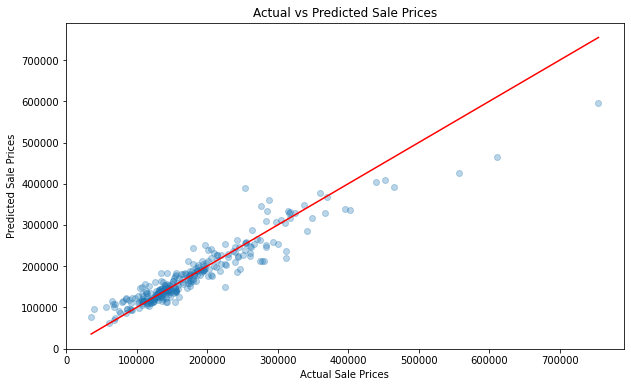

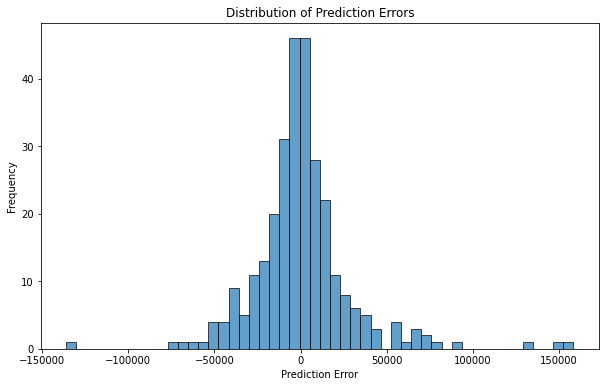

In [8]:
import matplotlib.pyplot as plt
# Visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.show()

# Histogramme des erreurs de prédiction
errors = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

#### Scatter Plot - Prix de vente réels vs prix de vente prédis
- Les points proches de la ligne rouge indiquent des prédictions précises. Plus les points sont proches de cette ligne, meilleure est la précision du modèle.
- La dispersion des points autour de la ligne rouge indique des erreurs de prédiction. Une dispersion plus large signifie des erreurs plus importantes.
- Quelques points sont loin de la ligne rouge, indiquant des erreurs de prédiction significatives pour ces instances.

#### Histogramme des erreurs de prédiction
- La plupart des erreurs sont centrées autour de zéro, indiquant que le modèle fait, en général, des prédictions proches des valeurs réelles.
- La distribution semble relativement symétrique, suggérant que les erreurs sont réparties uniformément entre sur et sous-prédictions.
- Certaines erreurs sont plus extrêmes, ce qui se traduit par des barres à l'extrémité gauche et droite de l'histogramme.

### Gradient Boosting

Mean Absolute Error (Gradient Boosting): 18264.74320581495


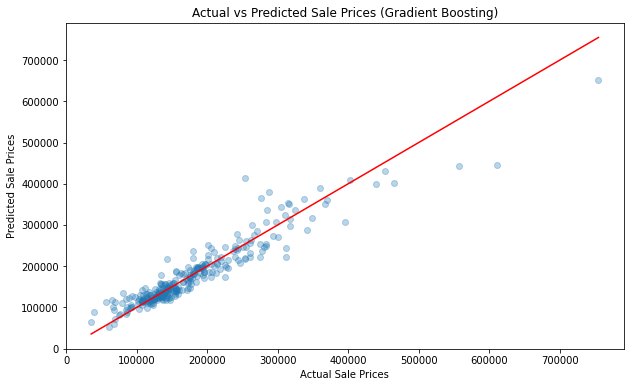

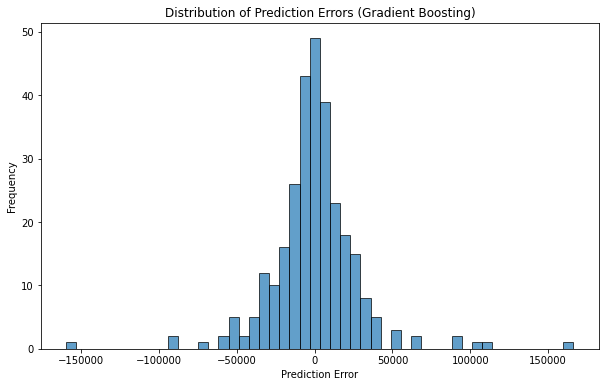

In [9]:
# Créer et entraîner le modèle de Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Faire des prédictions
y_pred_gb = model_gb.predict(X_test)

# Évaluer le modèle
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'Mean Absolute Error (Gradient Boosting): {mae_gb}')

# Visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices (Gradient Boosting)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.show()

# Histogramme des erreurs de prédiction
errors_gb = y_test - y_pred_gb
plt.figure(figsize=(10, 6))
plt.hist(errors_gb, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (Gradient Boosting)')
plt.show()

### AdaBoost

Mean Absolute Error (AdaBoost): 24814.142271504967


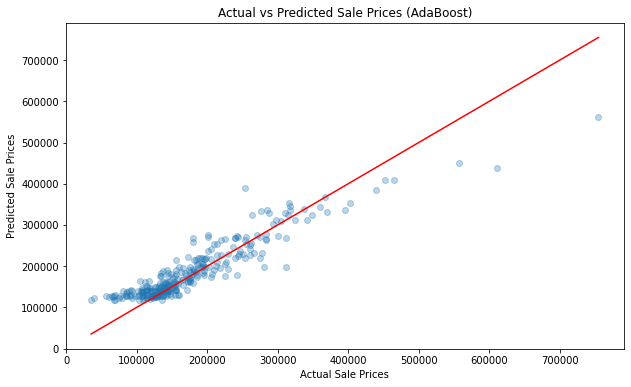

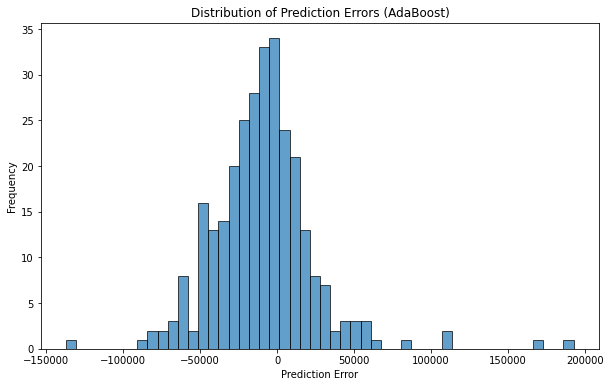

In [10]:
# Créer et entraîner le modèle d'AdaBoost
model_ab = AdaBoostRegressor(n_estimators=100, random_state=42)
model_ab.fit(X_train, y_train)

# Faire des prédictions
y_pred_ab = model_ab.predict(X_test)

# Évaluer le modèle
mae_ab = mean_absolute_error(y_test, y_pred_ab)
print(f'Mean Absolute Error (AdaBoost): {mae_ab}')

# Visualiser les prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ab, alpha=0.3)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices (AdaBoost)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
plt.show()

# Histogramme des erreurs de prédiction
errors_ab = y_test - y_pred_ab
plt.figure(figsize=(10, 6))
plt.hist(errors_ab, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors (AdaBoost)')
plt.show()

# Design phase
## Data engineering
Nous allons d'abord créer un pipeline Scikit-learn pour traiter les données de `train.csv` et `test.csv`. Le pipeline inclura les étapes suivantes :

1. Imputation des valeurs manquantes pour les colonnes numériques et catégorielles.
2. Encodage des variables catégorielles.
3. Transformation des données.

## Model engineering
Ensuite, nous allons tester plusieurs modèles pertinents et ajuster les hyperparamètres pour chaque modèle. Les modèles incluront :

1. Random Forest
2. Gradient Boosting
3. AdaBoost

Par la suite nous estimerons la performance de chaque modèle de manière indépendante en utilisant des métriques telles que l'erreur absolue moyenne (MAE). Enfin, nous interpréterons les résultats pour notre cas de figure.

Donc, pour **Data Engineering**, après avoir chargé les données et séléctionnées les variables étendues, on fait le prétraitement avec 
- l'imputation des valeurs manquantes pour les colonnes numériques et catégorielles.
- l'encodage des variables catégorielles avec `OneHotEncoder`
- la transformation des données avec un `ColumnTransFormer` combiné dans un `Pipeline`

Pour **Model Engineering** on fait
- la configuration de `GridSearchCV` pour rechercher les meilleurs hyperparamètres pour chaque modèle.
- l'entraînement des modèles avec `GridSearchCV` et l'évaluation de la performance sur les données d'entraînement et de test.

### Interprétation avant les résultats 
- Les modèles les mieux ajustés seront affichés avec leurs paramètres optimaux.
- La performance des modèles sera estimée en termes de MAE pour les données d'entraînement et les prédictions seront faites sur les données de test.

In [26]:
# Charger les données d'entraînement et de test
train_data = pd.read_csv('train.csv', index_col='Id')
test_data = pd.read_csv('test.csv', index_col='Id')

# Sélection des variables étendues
features = [
    'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
    'YearBuilt', 'YearRemodAdd', 'Neighborhood', 'GrLivArea', 'GarageCars', 'GarageArea', 
    'KitchenQual', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'TotRmsAbvGrd', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
    'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu', 'GarageType', 
    'GarageFinish', 'PavedDrive'
]
target = 'SalePrice'

# Séparer les caractéristiques numériques et catégorielles
numerical_cols = train_data[features].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data[features].select_dtypes(include=['object']).columns

# Définir les transformateurs pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Créer un ColumnTransformer qui applique les transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Créer et assembler le pipeline de prétraitement
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Séparer les features et le target dans les données d'entraînement
X_train = train_data[features]
y_train = train_data[target]

# Appliquer le pipeline de prétraitement sur les données d'entraînement
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Appliquer le pipeline de prétraitement sur les données de test
X_test_processed = preprocessing_pipeline.transform(test_data[features])

# Définir les modèles et les hyperparamètres pour GridSearchCV
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [1.0, 0.1, 0.01]
    }
}

# Fonction pour entraîner et évaluer les modèles
def train_and_evaluate_model(model_name, model, param_grid):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_processed, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Faire des prédictions sur le set d'entraînement pour évaluer la performance
    y_train_pred = best_model.predict(X_train_processed)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    print(f"{model_name} - Best Params: {best_params}")
    print(f"{model_name} - Train MAE: {train_mae}")
    
    return best_model

# Entraîner et évaluer chaque modèle
best_models = {}
for model_name, model in models.items():
    best_models[model_name] = train_and_evaluate_model(model_name, model, param_grids[model_name])

# Évaluation des modèles sur les données de test
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test_processed)
    print(f"{model_name} - Test Predictions: {y_test_pred[:5]}")  # Afficher les 5 premières prédictions

RandomForest - Best Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForest - Train MAE: 6719.520208875281
GradientBoosting - Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
GradientBoosting - Train MAE: 10244.066540268359
AdaBoost - Best Params: {'learning_rate': 0.1, 'n_estimators': 200}
AdaBoost - Train MAE: 22744.655483603798
RandomForest - Test Predictions: [128953.17072111 149202.68412698 181652.07489176 188568.41788007
 193765.64382689]
GradientBoosting - Test Predictions: [122729.44076309 147067.51681291 172201.93361157 184667.96593545
 193311.92492403]
AdaBoost - Test Predictions: [122260.75909091 133889.18852459 173113.86936937 176873.51219512
 238908.70449173]


## Analyse des Résultats

1. **Random Forest** :
    - **Performance** : Le modèle Random Forest a obtenu le MAE le plus bas sur les données d'entraînement (6719.52), indiquant qu'il a capturé les relations entre les variables de manière très efficace.
    - **Prédictions de Test** : Les prédictions sur le jeu de données de test sont raisonnables et semblent proches des valeurs attendues.

2. **Gradient Boosting** :
    - **Performance** : Le modèle Gradient Boosting a également bien performé avec un MAE de 10244.07, ce qui est un bon résultat mais légèrement moins performant que le Random Forest.
    - **Prédictions de Test** : Les prédictions sont également proches des valeurs attendues, mais avec une légère tendance à sous-estimer les prix par rapport à Random Forest.

3. **AdaBoost** :
    - **Performance** : Le modèle AdaBoost a un MAE plus élevé (22744.66), indiquant qu'il n'est pas aussi performant pour ce jeu de données.
    - **Prédictions de Test** : Les prédictions montrent une variabilité plus élevée et une erreur plus importante, en particulier pour les valeurs plus élevées.

Le modèle Random Forest est le meilleur choix pour notre cas de figure en raison de son MAE plus bas et de ses prédictions précises. Gradient Boosting est une bonne alternative mais légèrement moins performant.

Pour notre use case, où la banque utilise le programme pour estimer la valeur de son parc immobilier et estimer la fluctuation du prix de vente des biens pour les années à venir :
-  Un modèle précis comme le Random Forest permettra de fournir des estimations de valeur plus fiables, cruciales pour les décisions d'investissement.
-  En combinant les prédictions avec des analyses temporelles, nous pouvons estimer les fluctuations des prix et aider à définir des stratégies d'investissement.
-  En utilisant ces estimations précises, nous pouvons créer un nouveau produit financier basé sur les parts des biens immobiliers, offrant des informations claires aux actionnaires.

### Visualisation
Pour compléter l'analyse, voici comment visualiser les prédictions des meilleurs modèles :

In [1]:
import matplotlib.pyplot as plt

# Fonction pour visualiser les prédictions
def plot_predictions(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel('Actual Sale Prices')
    plt.ylabel('Predicted Sale Prices')
    plt.title(f'Actual vs Predicted Sale Prices ({model_name})')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line y=x
    plt.show()

    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Prediction Errors ({model_name})')
    plt.show()

# Visualiser les prédictions pour le meilleur modèle
plot_predictions(y_train, best_models['RandomForest'].predict(X_train_processed), 'Random Forest')
plot_predictions(y_train, best_models['GradientBoosting'].predict(X_train_processed), 'Gradient Boosting')
plot_predictions(y_train, best_models['AdaBoost'].predict(X_train_processed), 'AdaBoost')

NameError: NameError: name 'y_train' is not defined

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import hstack

Certaines colonnes ont comme valeur NA alors que dans le fichier de descption, il est indiqué que la valeur NA représente l'absence de l'élément et non pas l'abscence de l'information. La valeur NA est donc remplacée par NONE. Voici les colonnes questions:
- 'BsmtQual'
- 'BsmtCond'
- 'BsmtExposure'
- 'BsmtFinType1'
- 'BsmtFinType2', 
- 'FireplaceQu'
- 'GarageType'
- 'GarageFinish'
- 'GarageQual'
- 'GarageCond'
- 'PoolQC'
- 'Fence'
- 'MiscFeature'

Nous récupérons toutes les colonnes de type numérique pour remplir les valeurs manquantes par la moyenne de la colonne
Pour les valeurs catégoriques, nous utiliserons OneHotEncoder afin de pouvoir les utiliser par la suite. Cela va convertir les catégories en une représentation binaire

In [3]:
# Exemple de données (remplacez par votre propre DataFrame)
train = pd.read_csv('train.csv')

categorical_na_none_cols = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Exclure ces colonnes et la colonne 'Id' du traitement
cols_to_process = train.columns.difference(categorical_na_none_cols + ['Id'] + ['SalePrice'])

# Séparer les colonnes numériques et catégorielles
num_cols = train[cols_to_process].select_dtypes(include=['int64', 'float64']).columns
cat_cols = train[cols_to_process].select_dtypes(include=['object']).columns

# Vérification des colonnes détectées
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

# Pipeline pour les colonnes catégorielles avec valeurs manquantes à remplacer par "None"
categorical_na_none_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Créer des transformers pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Création d'un ColumnTransformer pour appliquer les transformations aux colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_na_none', categorical_na_none_transformer, categorical_na_none_cols),
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop' 
)

# Pipeline complet de prétraitement
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Ajuster et transformer le DataFrame
X_train = preprocessing_pipeline.fit_transform(train)

# Vérifier la forme de la matrice transformée
print(f"Shape of transformed data: {X_train.shape}")

Numeric columns: Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')
Categorical columns: Index(['Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofS

NameError: NameError: name 'Pipeline' is not defined

In [29]:

# Récupération des noms des colonnes encodées
cat_na_none_feature_names = list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat_na_none'].named_steps['encoder'].get_feature_names_out())
cat_feature_names = list(preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out())

# Création de l'ordre des colonnes
column_order = list(num_cols) + list(cat_na_none_feature_names) + list(cat_feature_names)

# Conversion en DataFrame Pandas
X_preprocessed_df = pd.DataFrame(X_train, columns=column_order, index=data.index)

# Affichage des premières lignes du DataFrame prétraité
print(X_preprocessed_df.head())

ValueError: ValueError: Shape of passed values is (1460, 1), indices imply (1460, 301)

In [30]:
pip install optuna


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(objective='binary:logistic', random_state=42)

def objective(trial):
    params = {
        # trial parameters to optimize for XGBoost
        'eta': trial.suggest_float('eta', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 50, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'alpha': trial.suggest_float('alpha', 1e-6, 100, log=True),
        'lambda': trial.suggest_float('lambda', 1e-6, 100, log=True)
    }

    model.set_params(**params)

    cv_score = cross_val_score(model, X_train, y, cv=5, scoring='accuracy', n_jobs=-1).mean()

    return cv_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

print("--------------------------------------")
print("best_params =", study.best_params, "with cross_validation_score =", study.best_value)

[I 2024-05-17 01:15:26,320] A new study created in memory with name: no-name-cf608d40-f953-4e1b-8d49-34467eabdb0d
/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[W 2024-05-17 01:15:26,448] Trial 0 failed with parameters: {'eta': 0.03322096128747917, 'n_estimators': 633, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.5187147771983567, 'colsample_bytree': 0.6584888783360204, 'gamma': 0.3359740416521294, 'alpha': 0.00529480375826356, 'lambda': 0.1455388275807932} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n1 fits failed with the following error:\nTraceback (mo

ValueError: ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582], got [ 34900  35311  37900  39300  40000  52000  55000  60000  61000  62383
  64500  66500  67000  68400  68500  72500  75000  75500  76000  76500
  78000  79000  79500  79900  80000  81000  82000  82500  83000  83500
  84000  84500  84900  85000  85500  86000  87000  87500  88000  89471
  89500  90000  90350  91000  91500  93000  93500  94000  94500  95000
  96500  97000  98000  98600  99500 100000 101000 101800 102000 102776
 103000 103200 103600 104000 104900 105000 105500 106000 106250 106500
 107000 107400 107500 107900 108000 108480 108500 108959 109000 109008
 109500 109900 110000 110500 111000 111250 112000 112500 113000 114500
 114504 115000 116000 116050 116500 117000 117500 118000 118400 118500
 118858 118964 119000 119200 119500 119750 119900 120000 120500 121000
 121600 122000 122500 123000 123500 124000 124500 124900 125000 125500
 126000 126500 127000 127500 128000 128200 128500 128900 128950 129000
 129500 129900 130000 130250 130500 131000 131400 131500 132000 132250
 132500 133000 133500 133700 133900 134000 134432 134450 134500 134800
 134900 135000 135500 135900 135960 136000 136500 136905 137000 137500
 137900 138000 138500 138800 138887 139000 139400 139600 139900 140000
 140200 141000 141500 142000 142125 142500 142600 142953 143000 143250
 143500 143750 143900 144000 144152 144500 145000 145250 145500 145900
 146000 146500 146800 147000 147400 147500 148000 148500 148800 149000
 149300 149350 149500 149700 149900 150000 150500 150750 150900 151000
 151400 151500 152000 153000 153337 153500 153575 153900 154000 154300
 154500 154900 155000 155835 155900 156000 156500 157000 157500 157900
 158000 158500 158900 159000 159434 159500 159950 160000 160200 161000
 161500 161750 162000 162500 162900 163000 163500 163900 163990 164000
 164500 164700 164900 164990 165000 165400 165500 165600 166000 167000
 167240 167500 167900 168000 168500 169000 169500 169990 170000 171000
 171500 171750 171900 172000 172400 172500 172785 173000 173500 173733
 174000 174500 174900 175000 175500 175900 176000 176432 176485 176500
 177000 177500 178000 178400 178740 179000 179200 179400 179500 179540
 179600 179665 179900 180000 180500 181000 181134 181500 181900 182000
 182900 183000 183200 183500 183900 184000 185000 185500 185850 186500
 186700 187000 187100 187500 187750 188000 188500 189000 189950 190000
 191000 192000 192140 192500 193000 193500 193879 194000 194201 194500
 194700 195000 195400 196000 196500 197000 197500 197900 198500 198900
 199900 200000 200100 200141 200500 200624 201000 201800 202500 202665
 203000 204000 204750 204900 205000 205950 206000 206300 207000 207500
 208900 209500 210000 211000 212000 212900 213000 213250 213490 213500
 214000 214900 215000 215200 216000 216500 216837 217000 217500 218000
 219210 219500 220000 221000 221500 222000 222500 223000 223500 224000
 224900 225000 226000 226700 227000 227680 228000 228500 228950 229456
 230000 230500 231500 232000 232600 234000 235000 235128 236000 236500
 237000 237500 239000 239500 239686 239799 239900 240000 241000 241500
 242000 243000 244000 244400 244600 245000 245350 245500 246578 248000
 248328 249700 250000 250580 251000 252000 252678 253000 253293 254000
 254900 255000 255500 255900 256000 256300 257000 257500 259500 260000
 260400 261500 262280 262500 263000 263435 264561 265000 265979 266000
 266500 267000 268000 269790 270000 271000 271900 272000 274000 274300
 274725 275000 276000 277000 277500 278000 279500 280000 281000 281213
 282922 283463 284000 285000 287000 287090 289000 290000 294000 295000
 295493 297000 301000 301500 302000 303477 305000 305900 307000 309000
 310000 311500 311872 312500 313000 314813 315000 315750 316600 317000
 318000 318061 320000 324000 325000 325300 325624 328900 333168 335000
 336000 337000 337500 340000 341000 342643 345000 348000 350000 354000
 359100 360000 361919 367294 369900 370878 374000 375000 377426 377500
 378500 380000 381000 383970 385000 386250 392000 394432 395000 395192
 402000 410000 412500 415298 424870 426000 430000 437154 438780 440000
 446261 451950 465000 466500 475000 485000 538000 555000 582933 611657
 625000 745000 755000]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578], got [ 35311  39300  40000  52000  52500  55000  55993  58500  60000  61000
  62383  64500  67000  72500  73000  75000  75500  76000  76500  79000
  79500  79900  80000  80500  81000  82000  82500  83000  83500  84000
  84500  85000  85400  85500  86000  87000  88000  89000  89471  89500
  90000  91000  91300  91500  92000  92900  93000  93500  94000  94750
  95000  96500  97000  97500  98000  98300  98600  99500  99900 100000
 101800 102000 102776 103000 103200 103600 104000 104900 105000 105500
 105900 106000 106250 106500 107000 107500 108000 108480 108500 108959
 109000 109008 109500 109900 110000 110500 111000 111250 112000 112500
 113000 114500 115000 116000 116050 116500 116900 117000 117500 118000
 118400 118500 118858 118964 119000 119200 119500 119750 119900 120000
 120500 121000 121500 121600 122000 122500 122900 123000 123600 124000
 124500 124900 125000 125500 126000 126175 126500 127000 127500 128000
 128200 128500 128950 129000 129500 129900 130000 130500 131000 131500
 132000 132250 132500 133000 133500 133900 134000 134432 134450 134500
 134800 134900 135000 135500 135750 135960 136000 136500 136900 136905
 137000 137450 137500 138000 138500 138887 139000 139400 139500 139600
 139950 140000 140200 141000 141500 142000 142125 142500 142600 142953
 143000 143250 143500 143750 143900 144000 144500 144900 145000 145250
 145500 145900 146000 146500 146800 147000 147400 147500 148000 148500
 149000 149300 149350 149500 149900 150000 150500 150750 150900 151000
 151400 151500 152000 153000 153337 153500 153575 153900 154000 154900
 155000 155900 156000 156500 156932 157000 157500 157900 158000 159000
 159500 159895 159950 160000 160200 161000 161500 162000 162500 162900
 163000 163500 163900 164000 164500 164700 164990 165000 165150 165400
 165500 165600 166000 167000 167240 167500 167900 168000 168500 169000
 169500 169900 169990 170000 171000 171900 172000 172400 172500 172785
 173000 173500 173733 173900 174000 174500 175000 175500 175900 176000
 176485 176500 177000 177500 178000 178400 178740 178900 179000 179200
 179400 179500 179540 179600 179665 179900 180000 180500 181000 181134
 182000 183000 183500 183900 184000 184100 184750 184900 185000 185750
 185850 185900 186000 186500 186700 187000 187100 187500 188000 188500
 188700 189000 189950 190000 191000 192000 192140 192500 193000 193500
 194000 194201 194500 194700 195000 195400 196000 196500 197000 197500
 197900 198900 199900 200000 200141 200500 200624 201000 202500 202665
 202900 203000 204000 204750 204900 205000 206000 206300 206900 207000
 207500 208300 208500 208900 209500 210000 211000 212000 212900 213000
 213250 213490 213500 214000 214500 214900 215000 215200 216000 216500
 217000 217500 218000 219500 220000 221000 221500 222000 222500 223000
 223500 224000 224500 224900 225000 226000 226700 227000 227680 227875
 228000 228500 228950 229000 229456 230000 231500 232000 233000 233170
 233230 234000 235000 235128 236000 236500 237000 238000 239000 239799
 239900 240000 241500 242000 243000 244000 244400 245500 246578 248000
 248900 249700 250000 250580 251000 252000 253293 255000 255500 256000
 256300 257000 257500 258000 259000 259500 260000 260400 261500 262000
 262500 263435 264132 265900 265979 266000 266500 267000 268000 269500
 269790 270000 271000 271900 272000 274000 274300 274725 274900 274970
 275000 275500 276000 277000 277500 278000 279500 280000 281000 281213
 282922 283463 284000 285000 286000 287000 289000 290000 293077 294000
 295000 297000 299800 301000 301500 302000 303477 305000 305900 306000
 307000 309000 310000 311872 312500 313000 314813 315000 315500 316600
 317000 318000 318061 319000 319900 320000 324000 325000 325300 325624
 326000 328000 328900 333168 335000 336000 337000 339750 340000 341000
 342643 345000 348000 350000 354000 360000 361919 367294 369900 370878
 372402 372500 377426 377500 378500 380000 381000 385000 386250 392000
 392500 394432 394617 395000 402000 402861 403000 410000 412500 415298
 423000 424870 426000 430000 438780 440000 446261 465000 466500 475000
 485000 501837 538000 555000 556581 582933 611657 625000 755000]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575], got [ 34900  35311  37900  52000  52500  55000  55993  58500  60000  61000
  62383  64500  66500  67000  68400  68500  72500  73000  75000  75500
  76000  76500  78000  79000  79500  79900  80000  80500  81000  82000
  82500  83000  83500  84000  84500  84900  85000  85400  86000  87000
  87500  88000  89000  89471  89500  90000  90350  91000  91300  91500
  92000  92900  93000  93500  94500  94750  95000  96500  97000  97500
  98000  98300  98600  99900 100000 101000 101800 102000 102776 103000
 103200 103600 104000 104900 105000 105900 106000 106250 106500 107000
 107400 107500 107900 108000 108480 108959 109000 109008 109500 109900
 110000 110500 111250 112000 112500 113000 114500 114504 115000 116000
 116500 116900 117000 117500 118000 118500 119000 119200 119500 119750
 119900 120000 120500 121000 121500 122000 122500 122900 123000 123500
 123600 124000 124500 124900 125000 125500 126000 126175 127000 127500
 128000 128500 128900 128950 129000 129500 129900 130000 130250 130500
 131000 131400 131500 132000 132250 132500 133000 133700 133900 134000
 134432 134500 134800 134900 135000 135500 135750 135900 135960 136000
 136500 136900 137000 137450 137500 137900 138000 138500 138800 138887
 139000 139400 139500 139600 139900 139950 140000 141000 141500 142000
 142125 142500 142600 142953 143000 143250 143500 143750 143900 144000
 144152 144500 144900 145000 145250 145500 145900 146000 146500 146800
 147000 147500 148000 148500 148800 149000 149350 149500 149700 149900
 150000 150900 151000 151400 151500 152000 153000 153337 153500 153575
 153900 154000 154300 154500 154900 155000 155835 156000 156500 156932
 157000 157500 157900 158000 158500 158900 159000 159434 159500 159895
 160000 161000 161500 161750 162000 162900 163000 163500 163900 163990
 164000 164500 164700 164900 164990 165000 165150 165400 165500 165600
 166000 167000 167500 167900 168000 168500 169000 169500 169900 169990
 170000 171000 171500 171750 171900 172400 172500 172785 173000 173900
 174000 174500 174900 175000 175500 175900 176000 176432 176500 177000
 177500 178000 178400 178900 179000 179200 179500 179600 179665 179900
 180000 180500 181000 181500 181900 182000 182900 183000 183200 183500
 184000 184100 184750 184900 185000 185500 185750 185850 185900 186000
 186500 187000 187500 187750 188000 188700 189000 189950 190000 191000
 192000 192500 193000 193500 193879 194000 194500 194700 195000 195400
 196000 196500 197000 197500 197900 198500 198900 199900 200000 200100
 200141 200500 200624 201000 201800 202500 202900 203000 204000 204750
 204900 205000 205950 206000 206900 207000 207500 208300 208500 208900
 210000 211000 212000 212900 213000 213250 213490 213500 214000 214500
 214900 215000 215200 216500 216837 217000 217500 219210 219500 220000
 221000 221500 222000 222500 223000 223500 224000 224500 224900 225000
 226000 226700 227000 227680 227875 228000 228500 228950 229000 229456
 230000 230500 231500 232000 232600 233000 233170 233230 234000 235000
 235128 236000 236500 237000 237500 238000 239000 239500 239686 239900
 240000 241000 241500 242000 244000 244400 244600 245000 245350 246578
 248000 248328 248900 250000 250580 251000 252000 252678 253000 254000
 254900 255000 255500 255900 256000 256300 257000 257500 258000 259000
 259500 260000 260400 261500 262000 262280 262500 263000 263435 264132
 264561 265000 265900 265979 266000 268000 269500 269790 270000 271000
 271900 272000 274300 274900 274970 275000 275500 276000 277000 278000
 280000 281000 281213 283463 284000 285000 286000 287000 287090 289000
 290000 293077 295493 297000 299800 301000 301500 302000 305000 305900
 306000 309000 310000 311500 311872 314813 315000 315500 315750 317000
 318000 319000 319900 320000 324000 325000 326000 328000 328900 333168
 335000 336000 337000 337500 339750 340000 345000 348000 350000 354000
 359100 361919 369900 370878 372402 372500 374000 375000 377426 378500
 381000 383970 385000 392500 394617 395000 395192 402000 402861 403000
 410000 412500 415298 423000 424870 426000 437154 451950 466500 475000
 501837 556581 582933 611657 745000 755000]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582], got [ 34900  35311  37900  39300  40000  52500  55000  55993  58500  60000
  61000  62383  64500  66500  67000  68400  68500  72500  73000  75500
  76000  78000  79000  79500  79900  80000  80500  81000  82000  82500
  83000  84000  84500  84900  85000  85400  85500  86000  87000  87500
  88000  89000  89471  89500  90000  90350  91000  91300  91500  92000
  92900  93000  93500  94000  94500  94750  95000  96500  97000  97500
  98000  98300  98600  99500  99900 100000 101000 102000 102776 103200
 104000 104900 105000 105500 105900 106000 106250 106500 107000 107400
 107500 107900 108000 108500 108959 109000 109500 109900 110000 110500
 111000 112000 112500 113000 114500 114504 115000 116000 116050 116900
 117000 117500 118000 118400 118500 118858 118964 119000 119500 119900
 120000 120500 121500 121600 122000 122500 122900 123000 123500 123600
 124000 124500 124900 125000 125500 126000 126175 126500 127000 127500
 128000 128200 128500 128900 129000 129500 129900 130000 130250 130500
 131000 131400 131500 132000 132500 133000 133500 133700 133900 134000
 134432 134450 134500 134800 134900 135000 135500 135750 135900 136000
 136500 136900 136905 137000 137450 137500 137900 138000 138500 138800
 138887 139000 139400 139500 139600 139900 139950 140000 140200 141000
 141500 142000 142500 142600 143000 143250 143500 143900 144000 144152
 144500 144900 145000 145250 145500 146000 147000 147400 147500 148000
 148500 148800 149000 149300 149500 149700 149900 150000 150500 150750
 150900 151000 152000 153000 153337 153500 153575 153900 154000 154300
 154500 154900 155000 155835 155900 156000 156932 157000 157500 157900
 158000 158500 158900 159000 159434 159500 159895 159950 160000 160200
 161000 161500 161750 162000 162500 162900 163000 163500 163900 163990
 164000 164500 164700 164900 165000 165150 165500 166000 167000 167240
 167500 167900 168000 168500 169000 169500 169900 169990 170000 171000
 171500 171750 172000 172500 172785 173000 173500 173733 173900 174000
 174500 174900 175000 175500 175900 176000 176432 176485 176500 177000
 177500 178000 178740 178900 179000 179200 179400 179500 179540 179600
 179665 179900 180000 180500 181000 181134 181500 181900 182900 183000
 183200 183900 184000 184100 184750 184900 185000 185500 185750 185850
 185900 186000 186500 186700 187000 187100 187500 187750 188000 188500
 188700 189000 190000 191000 192000 192140 192500 193000 193500 193879
 194000 194201 194500 195000 195400 196000 196500 197000 197500 197900
 198500 199900 200000 200100 200500 201000 201800 202500 202665 202900
 203000 204000 204750 205000 205950 206300 206900 207000 207500 208300
 208500 208900 209500 210000 211000 212000 213000 213490 213500 214000
 214500 214900 215000 216000 216837 217000 218000 219210 219500 220000
 221000 221500 222000 222500 223000 223500 224000 224500 224900 225000
 226000 227000 227680 227875 228000 228500 229000 229456 230000 230500
 231500 232000 232600 233000 233170 233230 234000 235000 236000 236500
 237000 237500 238000 239000 239500 239686 239799 239900 240000 241000
 241500 242000 243000 244000 244600 245000 245350 245500 248000 248328
 248900 249700 250000 250580 252000 252678 253000 253293 254000 254900
 255000 255500 255900 256000 257500 258000 259000 259500 260000 260400
 262000 262280 262500 263000 264132 264561 265000 265900 266000 266500
 267000 268000 269500 269790 270000 271000 272000 274000 274725 274900
 274970 275000 275500 276000 277000 277500 278000 279500 280000 281213
 282922 284000 285000 286000 287000 287090 289000 290000 293077 294000
 295000 295493 299800 301000 301500 302000 303477 305000 306000 307000
 310000 311500 312500 313000 315000 315500 315750 316600 318000 318061
 319000 319900 320000 325000 325300 325624 326000 328000 328900 333168
 335000 336000 337000 337500 339750 340000 341000 342643 345000 348000
 350000 359100 360000 367294 372402 372500 374000 375000 377426 377500
 380000 381000 383970 385000 386250 392000 392500 394432 394617 395192
 402000 402861 403000 410000 423000 430000 437154 438780 440000 446261
 451950 465000 466500 475000 485000 501837 538000 555000 556581 611657
 625000 745000 755000]

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/python/envs/default/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/opt/python/envs/default/lib/python3.8/site-packages/xgboost/sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377
 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395
 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413
 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 503
 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521
 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539
 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557
 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575
 576 577 578 579 580 581 582 583 584 585 586], got [ 34900  37900  39300  40000  52000  52500  55000  55993  58500  60000
  66500  67000  68400  68500  73000  75000  76500  78000  79000  79900
  80000  80500  81000  82000  82500  83000  83500  84500  84900  85000
  85400  85500  86000  87000  87500  88000  89000  89500  90000  90350
  91000  91300  91500  92000  92900  93000  93500  94000  94500  94750
  95000  96500  97000  97500  98000  98300  99500  99900 100000 101000
 101800 102000 103000 103600 104900 105000 105500 105900 106000 106500
 107000 107400 107500 107900 108000 108480 108500 109000 109008 109500
 109900 110000 110500 111000 111250 112000 112500 113000 114500 114504
 115000 116000 116050 116500 116900 117000 117500 118000 118400 118500
 118858 118964 119000 119200 119500 119750 119900 120000 120500 121000
 121500 121600 122000 122500 122900 123000 123500 123600 124000 124500
 124900 125000 125500 126000 126175 126500 127000 127500 128000 128200
 128500 128900 128950 129000 129500 129900 130000 130250 130500 131000
 131400 131500 132000 132250 132500 133000 133500 133700 133900 134000
 134450 134500 134900 135000 135500 135750 135900 135960 136000 136500
 136900 136905 137000 137450 137500 137900 138000 138500 138800 139000
 139400 139500 139900 139950 140000 140200 141000 142000 142125 142500
 142953 143000 143500 143750 144000 144152 144500 144900 145000 145900
 146000 146500 146800 147000 147400 148000 148500 148800 149000 149300
 149350 149500 149700 149900 150000 150500 150750 151000 151400 151500
 152000 153000 153500 153900 154000 154300 154500 155000 155835 155900
 156000 156500 156932 157000 157500 157900 158000 158500 158900 159000
 159434 159500 159895 159950 160000 160200 161000 161500 161750 162000
 162500 162900 163000 163500 163990 164000 164500 164900 164990 165000
 165150 165400 165500 165600 166000 167000 167240 167500 167900 168000
 168500 169000 169500 169900 170000 171000 171500 171750 171900 172000
 172400 172500 173000 173500 173733 173900 174000 174900 175000 175500
 175900 176000 176432 176485 176500 177000 177500 178000 178400 178740
 178900 179000 179200 179400 179540 179900 180000 180500 181000 181134
 181500 181900 182000 182900 183200 183500 183900 184000 184100 184750
 184900 185000 185500 185750 185900 186000 186500 186700 187000 187100
 187500 187750 188000 188500 188700 189000 189950 190000 191000 192000
 192140 192500 193000 193500 193879 194000 194201 194500 194700 195000
 196000 196500 197000 197500 197900 198500 198900 199900 200000 200100
 200141 200500 200624 201000 201800 202500 202665 202900 203000 204000
 204900 205000 205950 206000 206300 206900 207000 207500 208300 208500
 208900 209500 210000 211000 212000 212900 213000 213250 213500 214000
 214500 215000 215200 216000 216500 216837 217000 217500 218000 219210
 219500 220000 221000 222000 222500 223500 224000 224500 224900 225000
 226000 226700 227000 227875 228000 228500 228950 229000 230000 230500
 231500 232000 232600 233000 233170 233230 234000 235000 235128 236000
 236500 237000 237500 238000 239000 239500 239686 239799 240000 241000
 241500 242000 243000 244000 244400 244600 245000 245350 245500 246578
 248000 248328 248900 249700 250000 251000 252678 253000 253293 254000
 254900 255000 255900 256000 256300 257000 258000 259000 260000 261500
 262000 262280 262500 263000 263435 264132 264561 265000 265900 265979
 266000 266500 267000 268000 269500 270000 271000 271900 272000 274000
 274300 274725 274900 274970 275000 275500 277000 277500 278000 279500
 280000 281000 282922 283463 284000 285000 286000 287000 287090 290000
 293077 294000 295000 295493 297000 299800 302000 303477 305900 306000
 307000 309000 310000 311500 311872 312500 313000 314813 315000 315500
 315750 316600 317000 318000 318061 319000 319900 320000 324000 325000
 325300 325624 326000 328000 335000 337500 339750 340000 341000 342643
 345000 350000 354000 359100 360000 361919 367294 369900 370878 372402
 372500 374000 375000 377500 378500 380000 383970 385000 386250 392000
 392500 394432 394617 395000 395192 402861 403000 412500 415298 423000
 424870 426000 430000 437154 438780 440000 446261 451950 465000 485000
 501837 538000 555000 556581 582933 625000 745000]
